<a href="https://colab.research.google.com/github/Sujal3141/Sales-Prediction-Model/blob/main/Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("/content/drive/MyDrive/colab /Sales Prediction Model/laptop_cleaned2.csv")

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,24
Processor_gen,129
Core_per_processor,12
Total_processor,447


In [5]:
df.shape

(1020, 28)

In [6]:
df["Name"][555]

'HP 15s-fq5111TU Laptop (12th Gen Core i5/ 8GB/ 512GB SSD/ Win11 Home)'

In [7]:
df.drop(["Graphics_GB","Total_processor","Execution_units","Processor_gen"],axis=1,inplace=True)

In [8]:
df.shape

(1020, 24)

In [9]:
obj_col = df.select_dtypes(include="object").columns

In [10]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,24
Core_per_processor,12
Low_Power_Cores,0
Energy_Efficient_Units,0


In [11]:
null_col = df.columns[df.isnull().any()].tolist()

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
col = list(df.columns)

In [14]:
df.dtypes

,0
Name,object
Brand,object
Price,int64
Rating,float64
Processor_brand,object
Processor_name,object
Processor_variant,object
Core_per_processor,float64
Low_Power_Cores,float64
Energy_Efficient_Units,int64


In [15]:
null_col

['Processor_variant',
 'Core_per_processor',
 'Threads',
 'RAM_type',
 'Graphics_name',
 'Graphics_brand',
 'Graphics_integreted']

In [16]:
si = SimpleImputer(strategy="most_frequent")

In [17]:
float_null = list(df[null_col].select_dtypes(exclude="object"))

In [18]:
df_si = si.fit_transform(df[null_col])

In [19]:
df_si.shape

(1020, 7)

In [20]:
df_si=pd.DataFrame(df_si,columns=null_col)

In [21]:
for i in float_null:
  df_si[i]=df_si[i].astype('float64')

In [22]:
df_si.dtypes

,0
Processor_variant,object
Core_per_processor,float64
Threads,float64
RAM_type,object
Graphics_name,object
Graphics_brand,object
Graphics_integreted,object


In [23]:
for i in null_col:
  df[i] = df_si[i]

In [24]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,0
Core_per_processor,0
Low_Power_Cores,0
Energy_Efficient_Units,0


In [25]:
df.dtypes

,0
Name,object
Brand,object
Price,int64
Rating,float64
Processor_brand,object
Processor_name,object
Processor_variant,object
Core_per_processor,float64
Low_Power_Cores,float64
Energy_Efficient_Units,int64


In [26]:
np.random.seed(42)
df["Sales_vol"] = (1000 / (df["Price"] + 1)) * (1 + df["Rating"] / 5)+np.random.randint(0,2)

<Axes: xlabel='Sales_vol', ylabel='Count'>

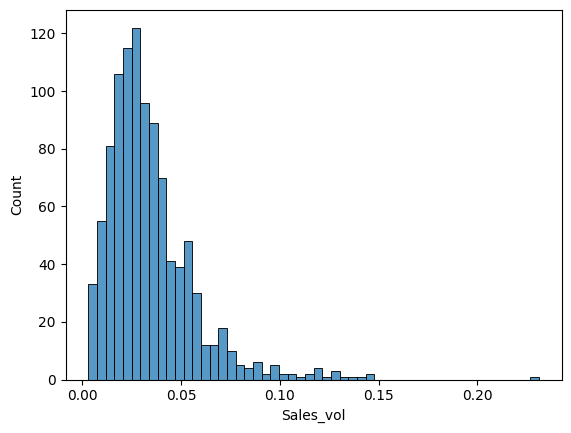

In [27]:
sns.histplot(df["Sales_vol"])

In [28]:
# sns.heatmap(df[list(df.dtypes(exclude="object"))].corr(),annot=True)

In [29]:
Y = df["Sales_vol"]
X = df.drop("Sales_vol",axis=1)

In [30]:
ohe = OneHotEncoder(sparse_output=False)

In [31]:
list(X.select_dtypes(include="float").columns)

['Rating',
 'Core_per_processor',
 'Low_Power_Cores',
 'Threads',
 'Display_size_inches',
 'ppi']

In [32]:
col = list(X.select_dtypes(include="object").columns)
float_columns = list(X.select_dtypes(include="float").columns)

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), col),
        ('num', 'passthrough', float_columns)
    ]
)

In [34]:
transformed_data = preprocessor.fit_transform(df)


In [35]:
list(X.select_dtypes(exclude="object").columns)

['Price',
 'Rating',
 'Core_per_processor',
 'Low_Power_Cores',
 'Energy_Efficient_Units',
 'Threads',
 'RAM_GB',
 'Storage_capacity_GB',
 'Display_size_inches',
 'Horizontal_pixel',
 'Vertical_pixel',
 'ppi',
 'Touch_screen']

In [36]:
df.dtypes

,0
Name,object
Brand,object
Price,int64
Rating,float64
Processor_brand,object
Processor_name,object
Processor_variant,object
Core_per_processor,float64
Low_Power_Cores,float64
Energy_Efficient_Units,int64


In [37]:
transformed_data

array([[  0.  ,   0.  ,   0.  , ...,  12.  ,  15.6 , 141.21],
       [  0.  ,   0.  ,   0.  , ...,   8.  ,  15.6 , 141.21],
       [  0.  ,   0.  ,   0.  , ...,   8.  ,  15.6 , 141.21],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  12.  ,  15.6 , 141.21],
       [  0.  ,   0.  ,   0.  , ...,  12.  ,  16.  , 141.51],
       [  0.  ,   0.  ,   0.  , ...,  12.  ,  16.  , 141.51]])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(transformed_data,Y,test_size=0.2,random_state=42)

In [39]:
model = XGBRegressor(n_estimators=1000, early_stopping_rounds=10)
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = model.predict(x_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [42]:
print("RMSE:", rmse)


RMSE: 0.008524002989227694


In [43]:
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

0.003672159751051342

In [44]:
# company = []
# for i in range(df.shape[0]):
#     company.append(df["Name"][i].split()[0])


In [45]:
# company = pd.DataFrame(company)

In [48]:

# import unicodedata
# def print_unicode_characters(s):
#     return [ord(char) for char in s]
# company[1] = company[0].apply(lambda x: print_unicode_characters(str(x)))
# def normalize_text(s):
#     return unicodedata.normalize('NFKD', str(s))
# company[1] = company[0].apply(normalize_text)


ValueError: Columns must be same length as key

In [ ]:
# count=0
# for i in company.value_counts().index:

#     count+=1
#     print(i)